# Цели проекта

Целью данной проектной работы является поиск причины убытка компании, не смотря на большие вложения в рекламу. 
Необходимо проанализировать основные метрики работы бизнеса, чтобы понять, в чем может быть причина убыточности и как ее можно исправить.

Входными данными являются:  
    - логи сервера с инфо о посещении сайта  
    - таблица с инфо о заказах клиентов  
    - таблица с инфо о затратах на рекламу  
 
В таблицах содержится инфо-ия и стране, в которой находится клиент, девайсе, с которогоон заходит, и рекламный канал, по которому клиент перешел на сайт.  

Для начала составим единую таблицу данных, в которую войдет инфо о пользователях, стоимости рекламы на конкретного пользователя, датах посещения сайта и признак, совершил ли данный пользователь покупку или нет

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

# Шаг 1. Загрузим данные и подготовим их к анализу

In [2]:
try:
    visits = pd.read_csv('visits_info_short.csv')
    orders = pd.read_csv('orders_info_short.csv')
    costs = pd.read_csv('costs_info_short.csv')
except:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')


In [3]:
def get_info(df):
    df.info()
    display(df.head())

In [4]:
get_info(visits)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [5]:
visits.rename(columns={"User Id": "user_id", "Session Start": "session_start",
                      "Session End": "session_end"}, inplace=True)

visits.columns = visits.columns.str.lower()

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [6]:
get_info(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [7]:
orders.rename(columns={"User Id": "user_id", "Event Dt": "event_dt"}, inplace=True)

orders.columns = orders.columns.str.lower()

orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [8]:
get_info(costs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [9]:
costs.columns = costs.columns.str.lower()

costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [10]:
get_info(visits)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [11]:
get_info(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [12]:
get_info(costs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


🧑‍🎓 Ира: Все три таблицы полные, без пропусков, но содержали кривые названия столбцов, что было исправлено переименовав столбцы.   
Так как таблицы загружены из csv файлов, форматы даты слетели, их исправили с помощью соответствующих функций. 

# Шаг 2. Задаем функции для расчета и анализа LTV, ROI, удержания и конверсии


In [13]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [14]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [15]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [16]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [17]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [18]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [19]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [20]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

# Шаг 3. Проведем исследовательский анализ данных

Построим профили пользователей. Определим минимальную и максимальную дату привлечения пользователей.

Выясним:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [21]:
profiles = get_profiles(visits, orders, costs)
display(profiles.head())

min_date = pd.to_datetime(profiles['first_ts']).dt.date.min()
max_date = pd.to_datetime(profiles['first_ts']).dt.date.max()
days_num = (max_date - min_date).days

print('min date = ', min_date, 'max date = ', max_date)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


min date =  2019-05-01 max date =  2019-10-27


In [22]:
def unique_count(df, item):
    payer_df = (
        df[df['payer'] == True].groupby(item)
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'payer_users'})
        .sort_values(by='payer_users', ascending=False)
        .reset_index()
    )
    
    all_df = (
        df.groupby(item)
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'all_users'})
        .sort_values(by='all_users', ascending=False)
        .reset_index()
    )
    
    result_df = payer_df.merge(all_df, on=item)
    result_df['payer_prop'] = ((result_df['payer_users'] / result_df['all_users']) * 100).round(1)

    return result_df
    

In [23]:
country_payer = unique_count(profiles, 'region')

country_payer


,region,payer_users,all_users,payer_prop
0,United States,6902,100002,6.9
1,UK,700,17575,4.0
2,France,663,17450,3.8
3,Germany,616,14981,4.1


🧑‍🎓 Ира: Страны, из которых приходят посетители, 4: США, Великобритания, Франция и Германия. 
Больше всего платящих пользователей из США.

Также можно заметить, что доля платящих пользователей в разбивке по регионам маленькая, в основном меньше 5 процентов 

In [24]:
device_payer = unique_count(profiles, 'device')

device_payer

,device,payer_users,all_users,payer_prop
0,iPhone,3382,54479,6.2
1,Android,2050,35032,5.9
2,Mac,1912,30042,6.4
3,PC,1537,30455,5.0


🧑‍🎓 Ира: клиенты пользуются телефонами и ноутбуками. Чаще всего платящие пользователи заходят с айфонов.

Здесь тоже можно отметить маленький процент платящих пользователей

In [25]:
channel_payer = unique_count(profiles, 'channel')

channel_payer

,channel,payer_users,all_users,payer_prop
0,FaceBoom,3557,29144,12.2
1,TipTop,1878,19561,9.6
2,organic,1160,56439,2.1
3,WahooNetBanner,453,8553,5.3
4,AdNonSense,440,3880,11.3
5,RocketSuperAds,352,4448,7.9
6,LeapBob,262,8553,3.1
7,OppleCreativeMedia,233,8605,2.7
8,lambdaMediaAds,225,2149,10.5
9,YRabbit,165,4312,3.8


🧑‍🎓 Ира: Привлечение клиентов шло по 10 разным каналам. Больше всего платящих пользователей привлекли через FaceBoom

# Шаг 4. Маркетинг

Выясним:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

In [26]:
all_sales = costs['costs'].sum()

print('Всего расходы на рекламу за весь период составили {}'.format(all_sales.round()))

Всего расходы на рекламу за весь период составили 105497.0


In [27]:
all_cac = profiles.query('channel != "organic"')['acquisition_cost'].mean()

print('CAC по всему прокету = {}'.format(all_cac))

CAC по всему прокету = 1.127481323942928


In [28]:
result_cost = (
        costs.groupby('channel')
        .agg({'costs': 'sum'})
        .rename(columns={'costs': 'cost_sum'})
        .sort_values(by='cost_sum', ascending=False)
        .reset_index()
    )

result_cost['cost_prop'] = ((result_cost['cost_sum'] / all_sales) * 100).round(2)

result_cost

,channel,cost_sum,cost_prop
0,TipTop,54751.30,51.90
1,FaceBoom,32445.60,30.75
2,WahooNetBanner,5151.00,4.88
3,AdNonSense,3911.25,3.71
4,OppleCreativeMedia,2151.25,2.04
5,RocketSuperAds,1833.00,1.74
6,LeapBob,1797.60,1.70
7,lambdaMediaAds,1557.60,1.48
8,MediaTornado,954.48,0.90
9,YRabbit,944.22,0.90


🧑‍🎓 Ира: Уже сейчас можно заметить, что общая сумма расходом на рекламу в TipTop больше, чем у остальных, хотя платящий пользователей платформа привлекла примерно в 2 раза меньше, чем FaceBoom, на рекламу в котором расходов меньше

In [29]:
report = costs.pivot_table(
    index = 'dt',
    columns = 'channel',
    values = 'costs',
    aggfunc = 'sum'
)

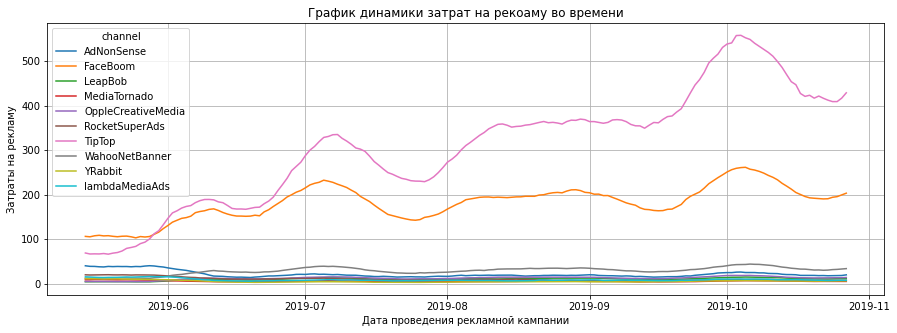

In [30]:
report.rolling(14).mean().plot(
    grid=True, figsize = (15, 5)
)
plt.title('График динамики затрат на рекоаму во времени')
plt.xlabel('Дата проведения рекламной кампании')
plt.ylabel('Затраты на рекламу')
plt.show()

In [31]:
cac_channel = result_cost.merge(channel_payer, on='channel')

cac_channel['cac'] = cac_channel['cost_sum'] / cac_channel['all_users']

cac_channel = cac_channel[['channel' ,'cac']]

cac_channel

,channel,cac
0,TipTop,2.799003
1,FaceBoom,1.113286
2,WahooNetBanner,0.602245
3,AdNonSense,1.008054
4,OppleCreativeMedia,0.250000
5,RocketSuperAds,0.412095
6,LeapBob,0.210172
7,lambdaMediaAds,0.724802
8,MediaTornado,0.218717
9,YRabbit,0.218975


🧑‍🎓 Ира: Можно заметить, что с течением времени расходы на рекламу в подавлябщем большинстве каналов находится в диапазоне 0-100, однако из этой массы выбиваются каналы FaceBoom и TipTop, в рекламу в этих каналах изначально вкладывались больше, чем в остальных, и со временем расходы на рекламу только увеличивались.  
Но расходы в FaceBoom даже с учетом увеличения держатся в районе 100-200 со скачками, то расходы на  TipTop растут более прогрессивно.  
В начале октября 2019 был самый большой скачок затрат на рекламу. 




# Шаг 5. Оценим окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI проанализируем:
- общую окупаемость рекламы;
- окупаемость рекламы с разбивкой по устройствам;
- окупаемость рекламы с разбивкой по странам;
- Покупаемость рекламы с разбивкой по рекламным каналам.

Мы смотрим данные 1-го ноября 2019 года, в организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

### Проанализируем общую окупаемость рекламы

In [32]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
profiles = profiles.query('channel != "organic"')

raw_data, ltv, ltv_in_time, roi, roi_in_time = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)

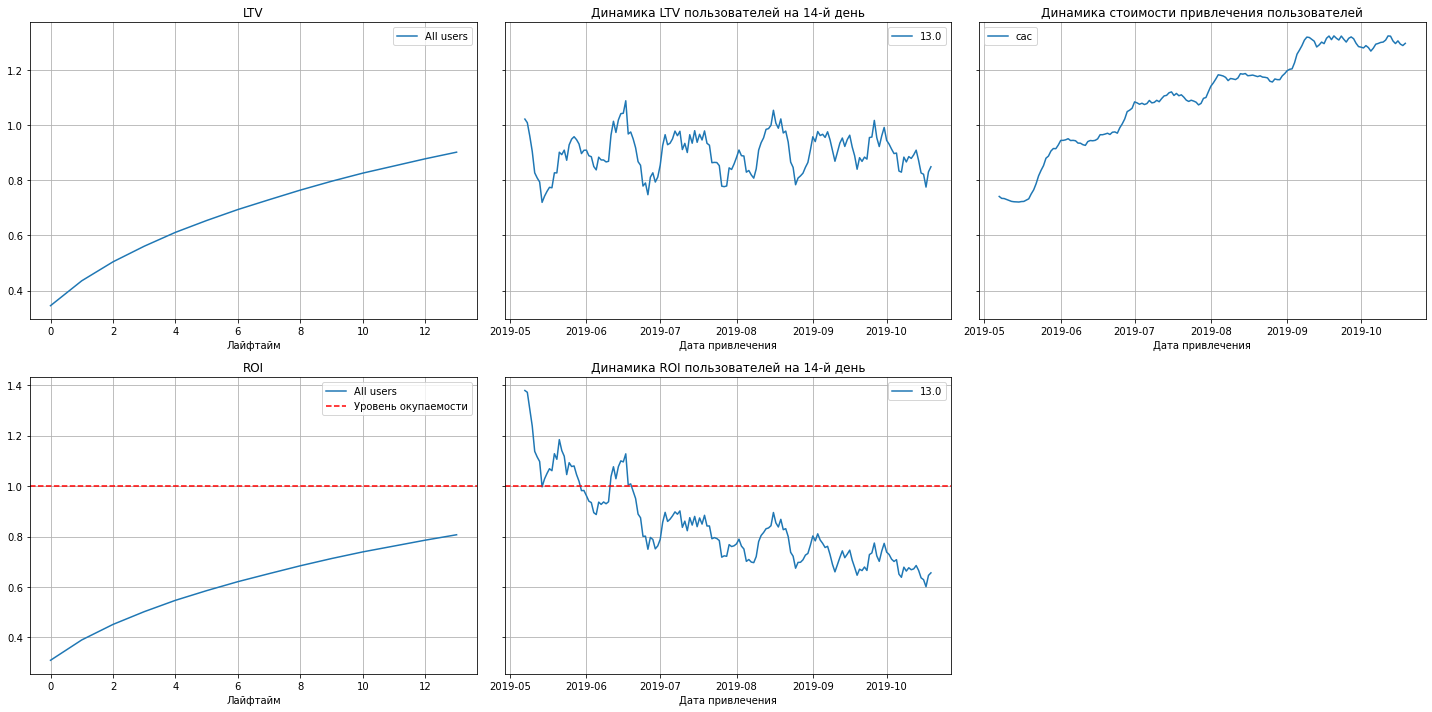

In [33]:
 plot_ltv_roi(ltv, ltv_in_time, roi, roi_in_time, horizon_days) 

🧑‍🎓 Ира: Реклама не окупается вовсе.  
САС растет со временем достаточно сильно.  
Чем выше растет САС, тем ниже опускается ROI во времени, это может быть одна из причин плохой окупаемости.

### Проанализируем окупаемость рекламы с разбивкой по устройствам

In [34]:
device_raw_data, device_ltv, device_ltv_in_time, device_roi, device_roi_in_time = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)

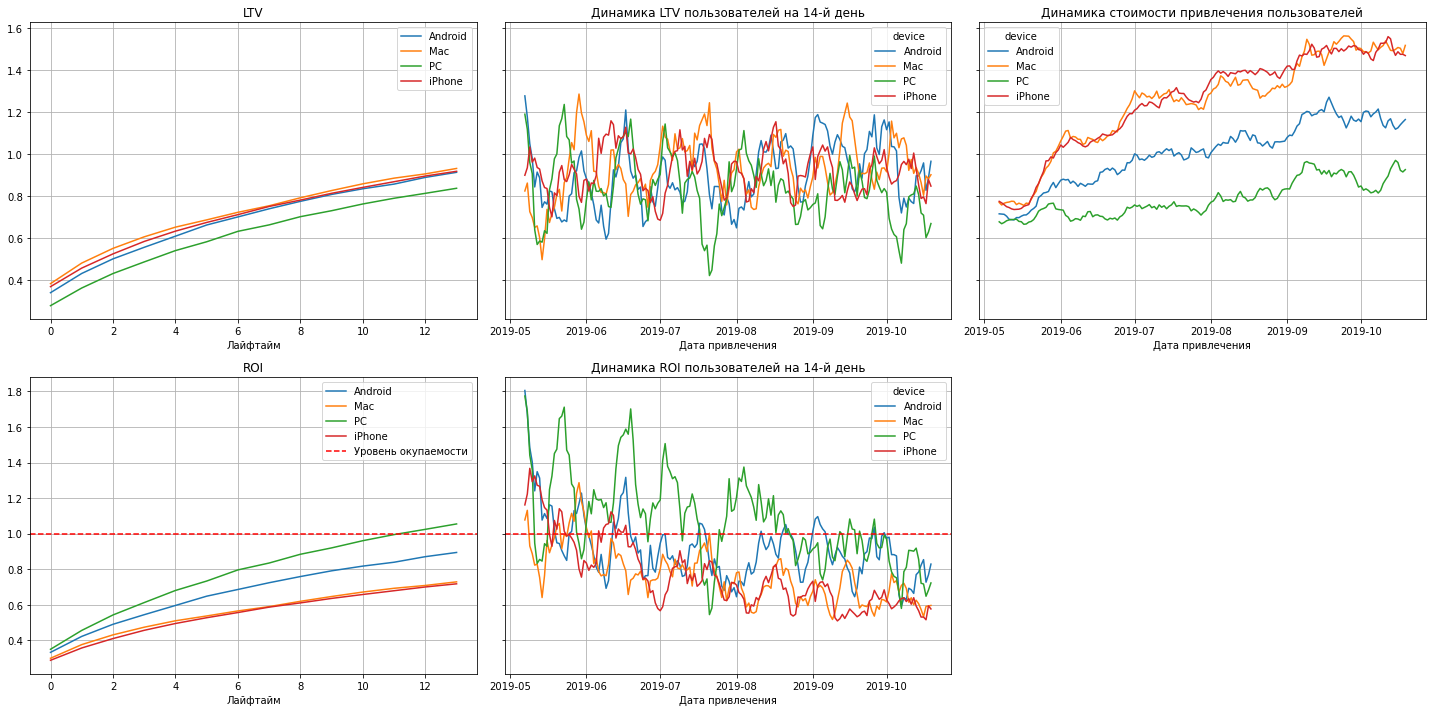

In [35]:
plot_ltv_roi(device_ltv, device_ltv_in_time, device_roi, device_roi_in_time, horizon_days) 

🧑‍🎓 Ира: В разбивке по устройствам можно заметить, что реклама практически не окупается в зависимости от устройства, к концу 2 недели она лишь немного переваливает за 1 для ПК.  
Так же можно заметить, что в июне САС резко вырос для всех устройств, и в этом же месяце ROI начинает падать. 
Соотвтетсвенно, на рекламу на разных девайсах стало уходить больше денег, но при этом большей прибыли от этого не случилось.  
Но ROI более-менее окупается только у ПК, поэтому вряд ли проблема в девайсе, которым пользуюься клиенты

### Проанализируем окупаемость рекламы с разбивкой по странам

In [36]:
region_raw_data, region_ltv, region_ltv_in_time, region_roi, region_roi_in_time = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)

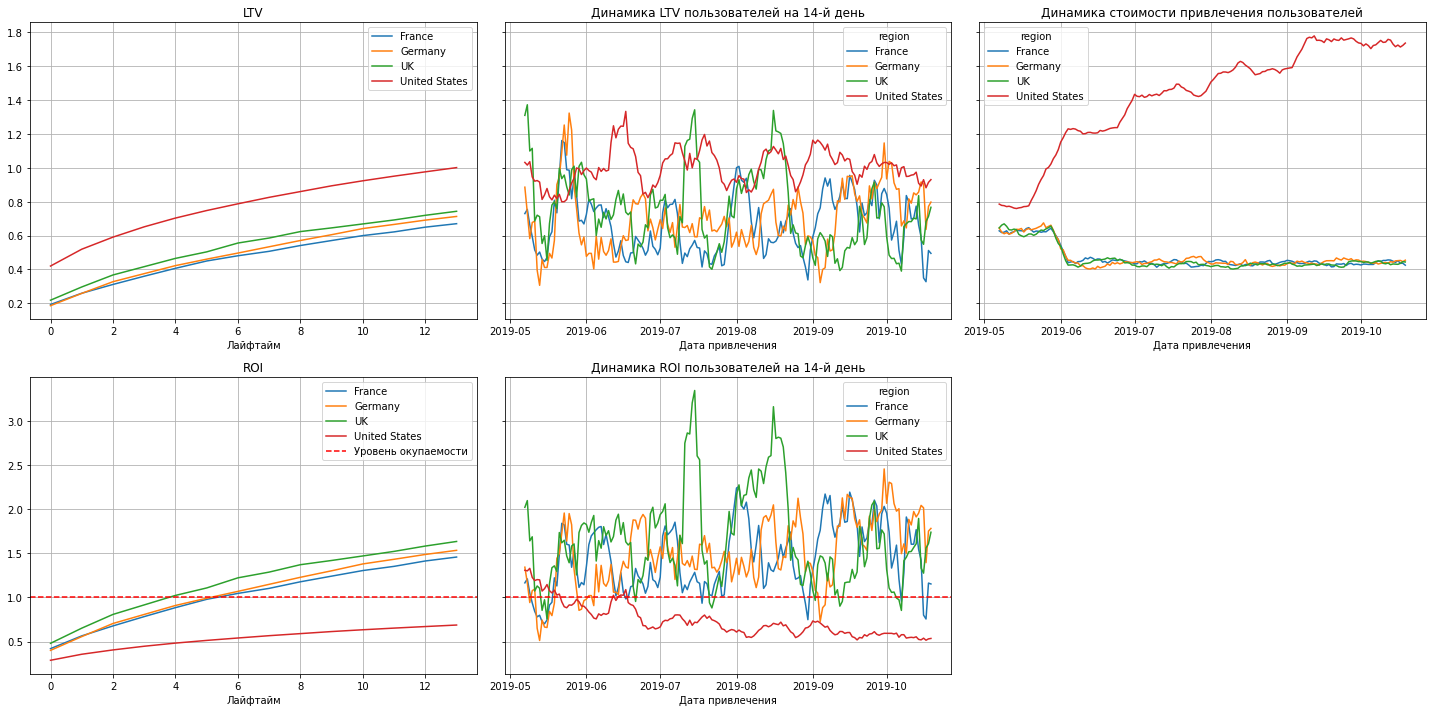

In [37]:
plot_ltv_roi(region_ltv, region_ltv_in_time, region_roi, region_roi_in_time, horizon_days) 

🧑‍🎓 Ира: Реклама окупается везде кроме США, хотя из США приходит больше всего платящих пользователей(это выяснили выше).  
И к тому же, САС для США резко уходит вверх начиная с июня.  Это может быть одной из причин отсутствия окупаемости рекламы в США
Все остальные регионы показывают roi почти в 2 раза выше уровня окупаемости, при том что САС у них практически стабилен

### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам

In [38]:
channel_raw_data, channel_ltv, channel_ltv_in_time, channel_roi, channel_roi_in_time = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)

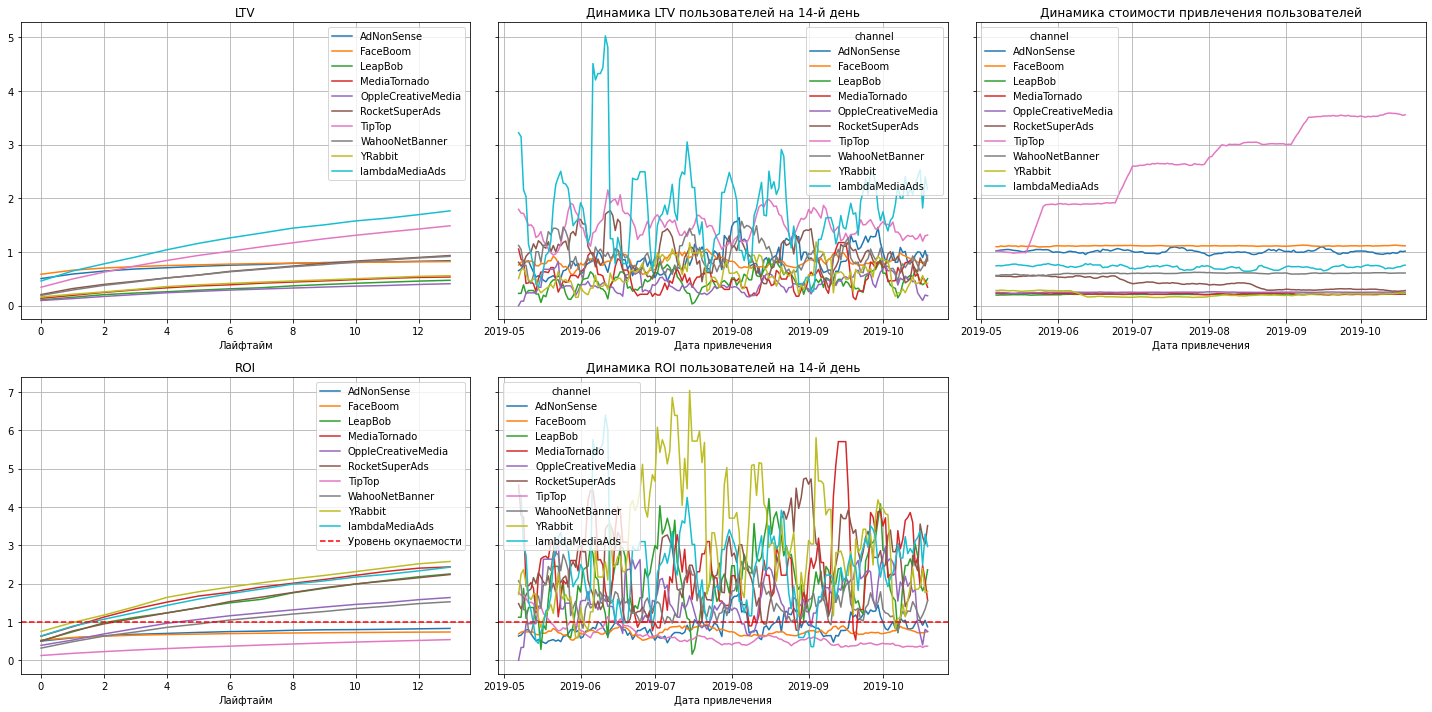

In [39]:
plot_ltv_roi(channel_ltv, channel_ltv_in_time, channel_roi, channel_roi_in_time, horizon_days) 

🧑‍🎓 Ира: В разбивке по каналам видно, что реклама окупается там, где маленькие расходы на рекламу, причем в некоторых каналах более чем в 2 раза. 
А вот каналы FaceBoom и TipTop не окупаются вовсе, хотя на них, как мы уже выяснили раньше, больше всего расходуют денег на рекламу.
по графику САС видно, что стоимость привлечения для TipTop постоянно растет, а вот для FaceBoom САС стабилен, значит дело в чем-то другом(как вариант дело в регионе, выше выяснили, что у США все плохо).

🧑‍🎓 Ира: в промежутке можно сказать, что есть проблема с превличением пользователей по каналам FaceBoom и TipTop, они явно не задерживаются так, как того хотели при распределении бюджета на рекламу, даже не смотря на то, что обе эти платформы в лидерах по кол-ву платящих пользователей. 

### Проанализируем удержание и конверсию пользователей с разбивкой по устройствам

In [40]:
ret_d_raw_data, ret_d_result, ret_d_in_time = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)

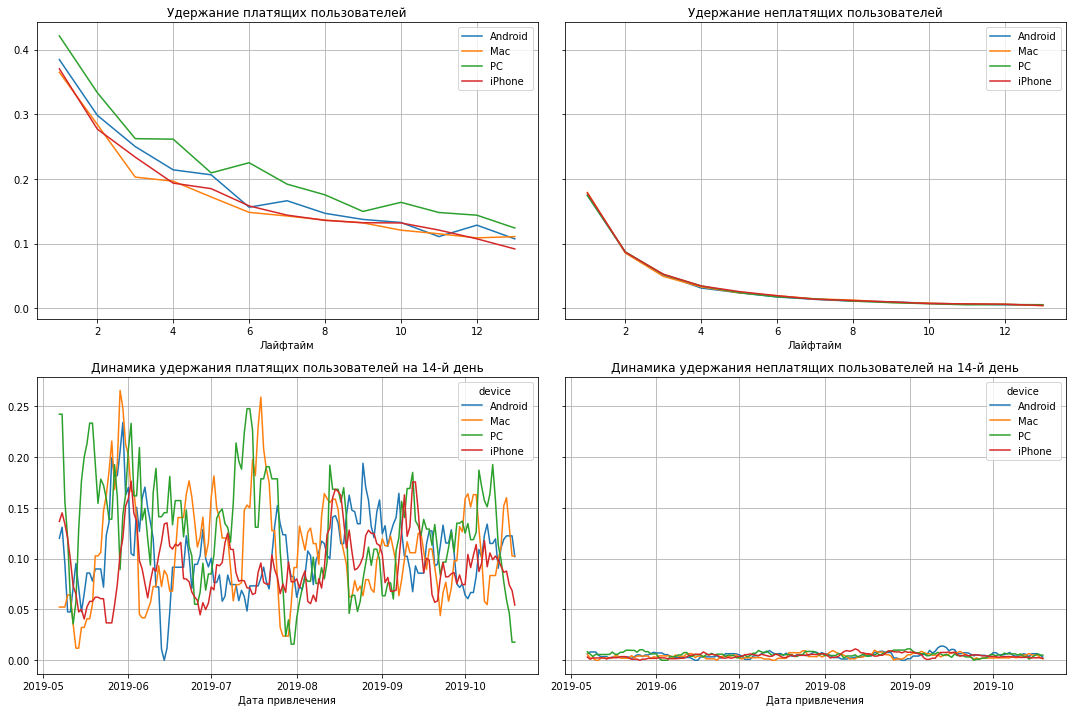

In [41]:
plot_retention(ret_d_result, ret_d_in_time, horizon_days) 

🧑‍🎓 Ира: Здесь нет особой зацепки, платящие пользователи ПК удерживаются лучше, у них и ROI выше, и наоборот для пользователей с МАС и айфонами. Динамика удержания неплатящих пользователей к концу 2 недели практически нулевая.

In [42]:
conv_d_raw, conv_d_result, conv_d_in_time = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

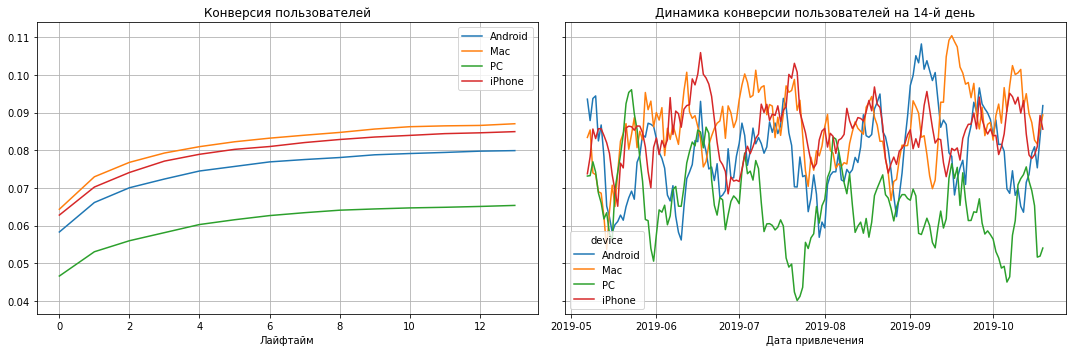

In [43]:
plot_conversion(conv_d_result, conv_d_in_time, horizon_days) 

🧑‍🎓 Ира: конверсия самая низкая у пользователей ПК, хотя они окупаются уже на 7 день, а у маков и айфонов конверсия выше всего. То есть клиенты охотно переходят в "состояние" платящих пользователей, но не задерживаются в этом состоянии.

### Проанализируем удержание и конверсию пользователей с разбивкой по странам

In [44]:
ret_r_raw_data, ret_r_result, ret_r_in_time = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)

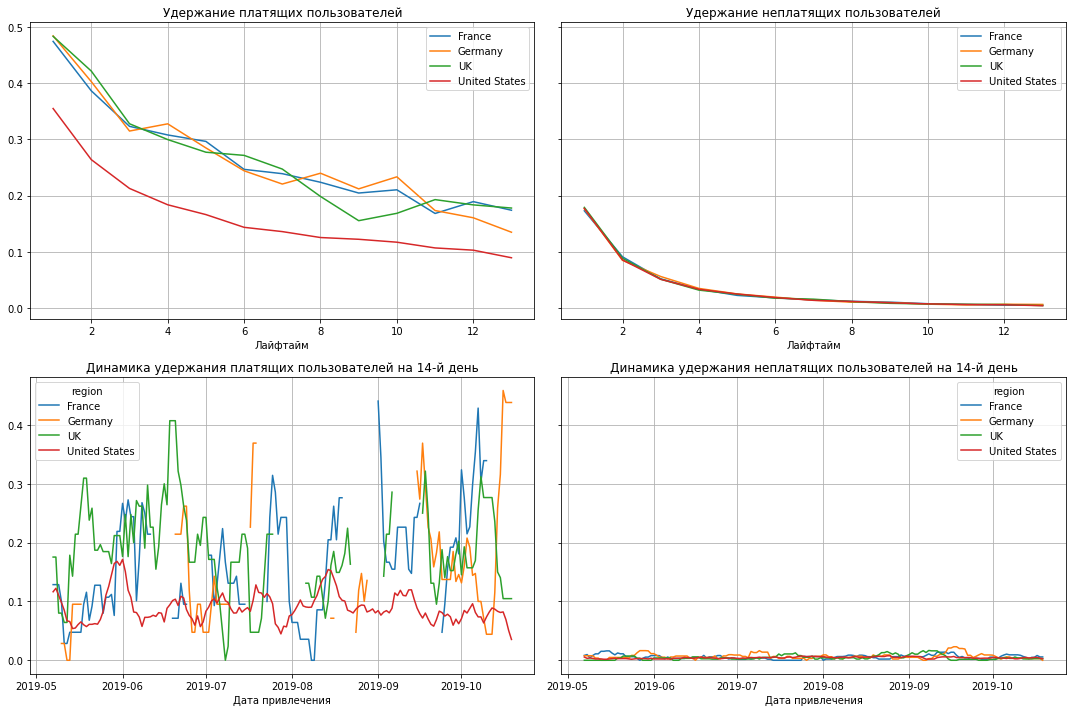

In [45]:
plot_retention(ret_r_result, ret_r_in_time, horizon_days) 

🧑‍🎓 Ира: Пользователи из США плохо удерживаются, в 2 раза ниже чем остальные, это может быть связано с повышенным САС и плохой окупаемостью

In [46]:
conv_r_raw, conv_r_result, conv_r_in_time = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

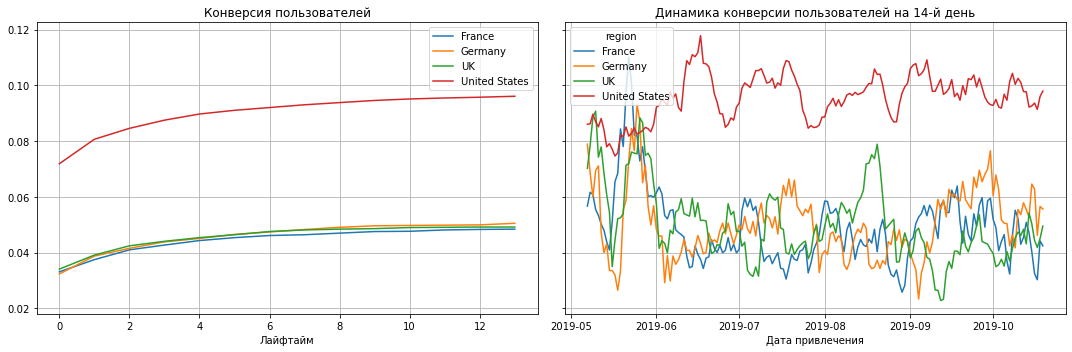

In [47]:
plot_conversion(conv_r_result, conv_r_in_time, horizon_days) 

🧑‍🎓 Ира: Пользователи из США также хорошо конвертируются, но не задерживаются

### Проанализируем удержание пользователей с разбивкой по рекламным каналам

In [48]:
ret_c_raw_data, ret_c_result, ret_c_in_time = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)

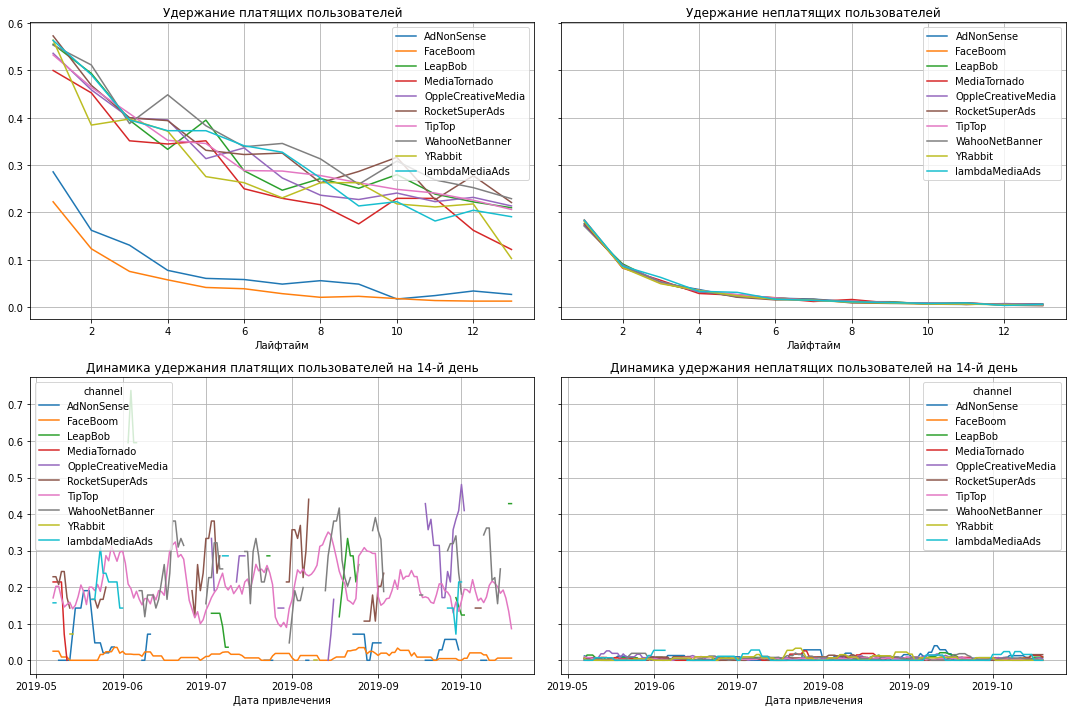

In [49]:
plot_retention(ret_c_result, ret_c_in_time, horizon_days) 

🧑‍🎓 Ира: Пользователи фейсбум очень плохо удерживаются, это может влиять на окупаемость рекламы на этой платформе

In [50]:
conv_с_raw, conv_с_result, conv_с_in_time = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

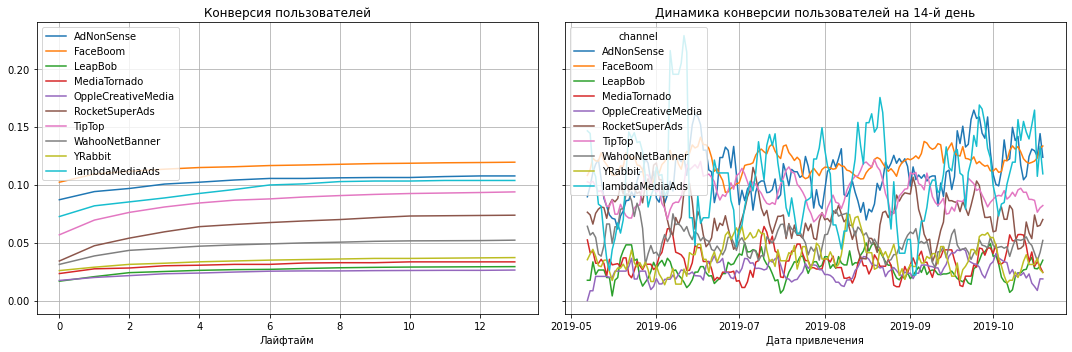

In [51]:
plot_conversion(conv_с_result, conv_с_in_time, horizon_days) 

🧑‍🎓 Ира: Пользователи, пришедшие через ФейсБум тоже хорошо конвертируются, но не задерживаюьтся

🧑‍🎓 Ира: Промужеточные выводы: Реклама не окупается, есть проблемные каналы - ФейсБум и ТипТоп, так же следует изучить, почему не окупается реклама в США, САС в этом регионе растет довольно резко, при этом рекоама не окупается с течением времени практически по всему периоду анализу, следует понять6 почему реклама в США такая дорогая.  
В основном можно сказать, что пользователи хорошо конвертируются в платящих, но при этом не задерживаются, удержание по США, платформам ФейсБум, девайсам по типу айфон и МАС очень низкое

In [52]:
prep_df = (
        profiles.groupby(['region', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'all_users'})
        .sort_values(by='all_users', ascending=False)
        .reset_index()
    )

prep_df

,region,channel,all_users
0,United States,FaceBoom,29144
1,United States,TipTop,19561
2,United States,RocketSuperAds,4448
3,United States,MediaTornado,4364
4,United States,YRabbit,4312
5,UK,OppleCreativeMedia,3052
6,UK,LeapBob,3046
7,UK,WahooNetBanner,3003
8,France,OppleCreativeMedia,2991
9,France,LeapBob,2988


# Шаг 6. Выводы

Были проанализированы данные о рекламной кампании в разбивке по странам, устройствам и каналам продаж.  
Больше всего расходов на рекламу компания тратит на каналы ФейсБум и ТипТоп.  
При этом, пользователи, привлеченные из ФейсБум очень плохо удерживаются, хотя хорошо конвертируются. Но удержание платящих пользователей, привлеченных через ФейсБум в конце 2 недели практически = 0.

Если говорить про разбивку по странам и девайсам, то ситуация там примерно похожая, в США и через девайсы МАС и айфон пользователи хорошо конвертируются, но плохо удерживаются.

Это может быть связано с какой-то ошибкой в приложении, которая появляется уже после совершения первой покупки, можно проверить эту гипотезу. 

С плохой окупаемостью по каналу ТипТоп на мой взгляд причина в постоянном росте стоимости привлечения пользователей, так как удержание пользователей держится на уровне с остальными. Возможно цена за рекламу на этой платформе постоянно растет.

Рекомендации: 

    - Я бы обратила внимание на канал привлечения lambdaMediaAds, его пользователи хорошо конвертируются и удерживаются
    - Для стран Европы можно рассмотреть канал LeapBob, там тоже хорошее удержание пользователей.    
        При этом в оба эти канала вкладывается не очень много денег, и сейчас там не самый высокий САС.  
    - На Каналы ФейсБум и ТипТоп я бы тоже обратила внимание, только в другом ключе: следует понять, почему пользователи этих платформ стоят дороже всех и при этом не окупаются. Так как в основном пользователи из США переходят через эти каналы, а мы выяснили, что у США-клиентов тоже плохая окупаемость, скорее всего это как-то связано, и это следует изучить более детально. 